# London Bike Sharing Dataset

Metadata:

"timestamp":  timestamp field for grouping the data.

"cnt":  the count of a new bike shares.

"t1":  real temperature in c.

"t2":  temperature in c 'feels like'.

"hum":  humidity in percentage.

"windspeed":  windspeed in km/h.

"weathercode":  category of the weather.

"isholiday":  boolean field - 1 holiday, 0 non-holiday.

"isweekend":  boolean field - 1 if the day is weekend.

"season":  category field meterological seasons: 0 - spring, 1 - summer, 2 - fall, 3 - winter.

weather code category description:

1 = clear; mostly clear but have some values with haze/fog/patches of fog / fog in vicinity.

2 = scattered clouds / few clouds.

3 = broken clouds.

4 = cloudy.

7 = rain / light rain shower / light rain.

10 = rain with thunderstorm.

26 = snowfall.

94 = freezing fog.

# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

# 2. Import and Understand Dataset

In [2]:
dataset = pd.read_csv("london_merged.csv")

**Verifying it as a 'DataFrame' object in pandas**

In [3]:
type(dataset)

pandas.core.frame.DataFrame

**Printing out a few columns**

In [4]:
dataset.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
dataset.sample(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
14153,2016-08-19 12:00:00,952,19.0,19.0,83.0,11.0,7.0,0.0,0.0,1.0
15606,2016-10-20 14:00:00,1313,13.5,13.5,69.5,19.0,7.0,0.0,0.0,2.0
1584,2015-03-11 02:00:00,56,4.5,3.5,87.0,6.0,1.0,0.0,0.0,0.0
10473,2016-03-17 14:00:00,1180,11.0,11.0,44.0,19.5,1.0,0.0,0.0,0.0
11646,2016-05-06 03:00:00,77,9.5,9.0,79.0,6.0,1.0,0.0,0.0,0.0


**Let's set the column timestamp as index**

In [6]:
dataset = dataset.set_index("timestamp")
dataset.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


**Shape of dataset**

In [7]:
dataset.shape

(17414, 9)

**Description**

In [8]:
dataset.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3+ MB


**As observe, we have no null values in dataset**

**Let's convert the dataset columns 'weather_code', 'is_holiday', 'is_weekend', and 'season' values in integer**

In [10]:
dataset = dataset.astype({"weather_code": int, "is_holiday": int, "is_weekend": int, "season": int})
dataset.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3


**Now let's assign the columns 'weather_code' and 'season' by their category**

In [11]:
weathercode = {1:"clear", 2:"scattered clouds", 3:"Broken clouds", 4:"Cloudy", 7:"Light Rain", 
              10:"Rain Thunderstorm", 26:"Snowfall", 94:"Freezing Fog"}

In [12]:
seasons = {0:"Spring", 1:"Summer", 2:"Fall", 3:"Winter"}

In [13]:
dataset["weather_code"] = dataset["weather_code"].replace(weathercode)
dataset["season"] = dataset["season"].replace(seasons)
dataset.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,0,1,Winter
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,clear,0,1,Winter
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,clear,0,1,Winter
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,clear,0,1,Winter
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,clear,0,1,Winter


# 3. Data Visualization

In [14]:
con = [] # Quantitative data
cat = [] # Categorical data

**Analyze the correlation between columns**

<AxesSubplot:>

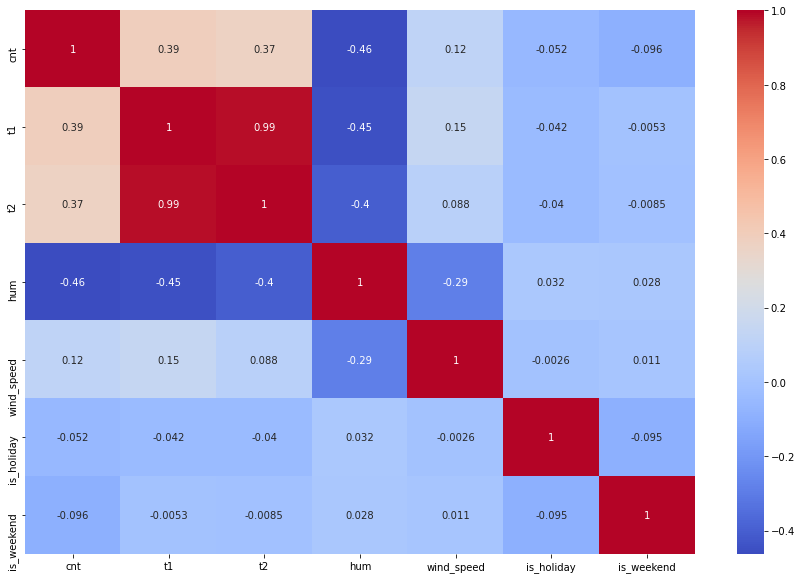

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")

**Analyze the 'cnt' column**

<AxesSubplot:xlabel='cnt'>

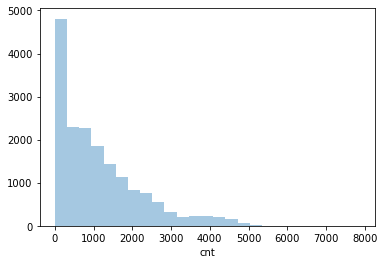

In [16]:
sns.distplot(dataset["cnt"], kde=False, bins = 25)

**Analyze the 't1' temperature column**

<AxesSubplot:xlabel='t1'>

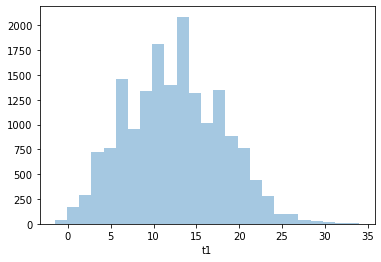

In [17]:
sns.distplot(dataset["t1"], kde=False, bins = 25)

In [18]:
con.append("t1")

**Analyze the 't2' temperature feels like column**

<AxesSubplot:xlabel='t2'>

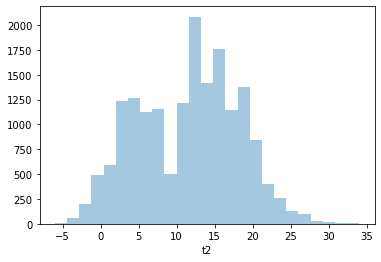

In [19]:
sns.distplot(dataset["t2"], kde=False, bins = 25)

In [20]:
con.append("t2")

**Analyze the 'hum' humidity column**

<AxesSubplot:xlabel='hum'>

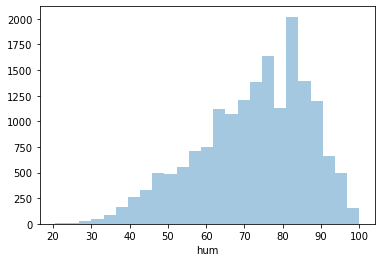

In [21]:
sns.distplot(dataset["hum"], kde=False, bins = 25)

In [22]:
con.append("hum")

**Analyze the 'wind_speed' column**

<AxesSubplot:xlabel='wind_speed'>

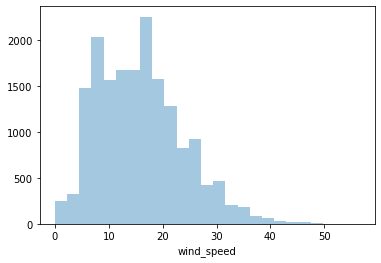

In [23]:
sns.distplot(dataset["wind_speed"], kde=False, bins = 25)

In [24]:
con.append("wind_spped")

**Analyze 'weather_code' column**

clear                6150
scattered clouds     4034
Broken clouds        3551
Light Rain           2141
Cloudy               1464
Snowfall               60
Rain Thunderstorm      14
Name: weather_code, dtype: int64


<AxesSubplot:xlabel='weather_code', ylabel='count'>

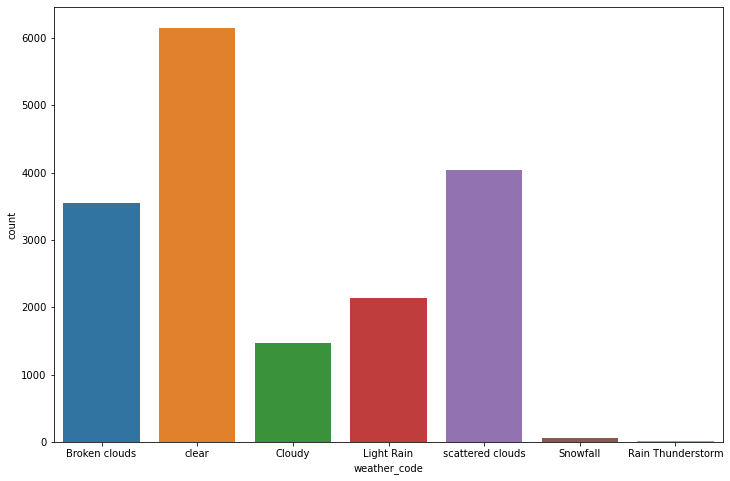

In [25]:
plt.figure(figsize=(12,8))
print(dataset["weather_code"].value_counts())
sns.countplot(dataset["weather_code"])

In [26]:
cat.append("weather_code")

<AxesSubplot:xlabel='weather_code', ylabel='cnt'>

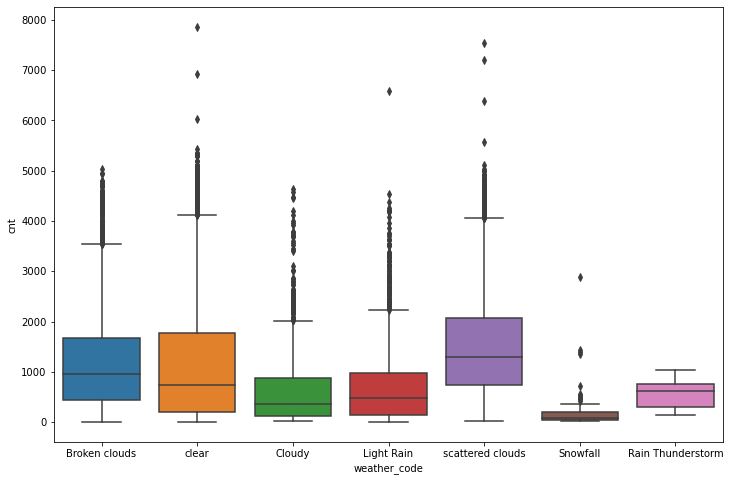

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(dataset["weather_code"], dataset["cnt"])

**Analyze the 'is_holiday' column**

0    17030
1      384
Name: is_holiday, dtype: int64


<AxesSubplot:xlabel='is_holiday', ylabel='count'>

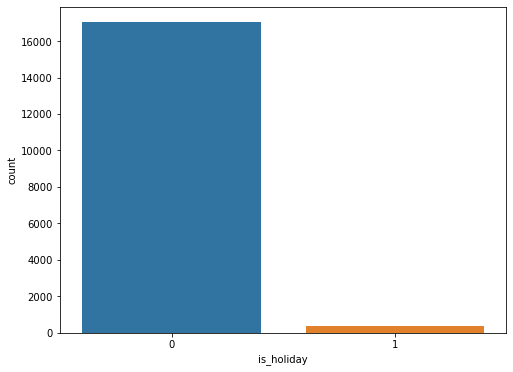

In [28]:
plt.figure(figsize=(8,6))
print(dataset["is_holiday"].value_counts())
sns.countplot(dataset["is_holiday"])

In [29]:
cat.append("is_holiday")

Text(0.5, 1.0, 'Mean holiday or not holiday')

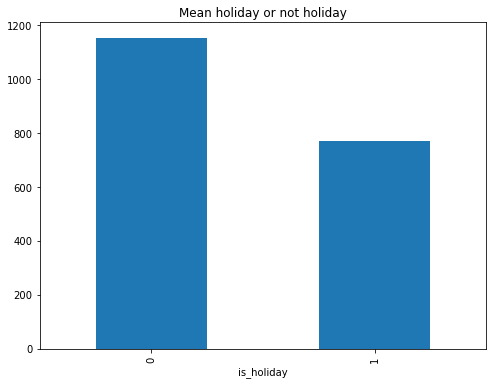

In [30]:
plt.figure(figsize=(8,6))
dataset.groupby("is_holiday").mean()["cnt"].plot.bar()
plt.title("Mean holiday or not holiday")

**Analyze the 'is_weekend' column**

0    12444
1     4970
Name: is_weekend, dtype: int64


<AxesSubplot:xlabel='is_weekend', ylabel='count'>

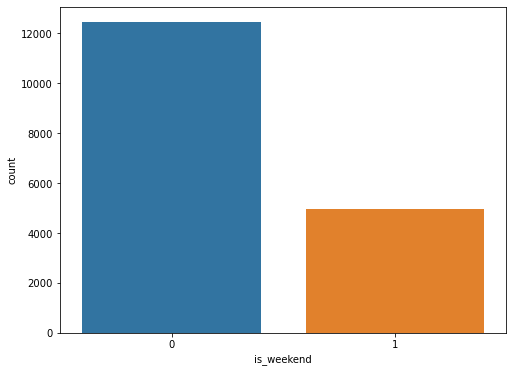

In [31]:
plt.figure(figsize=(8,6))
print(dataset["is_weekend"].value_counts())
sns.countplot(dataset["is_weekend"])

In [32]:
cat.append("is_weekend")

Text(0.5, 1.0, 'Mean of weekend or not weekend')

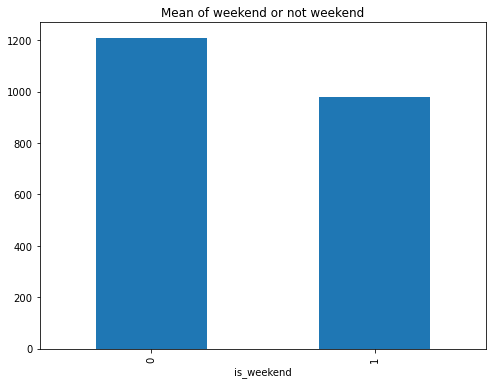

In [33]:
plt.figure(figsize=(8,6))
dataset.groupby("is_weekend").mean()["cnt"].plot.bar()
plt.title("Mean of weekend or not weekend")

**Analyze the 'season' column**

Spring    4394
Summer    4387
Winter    4330
Fall      4303
Name: season, dtype: int64


<AxesSubplot:xlabel='season', ylabel='count'>

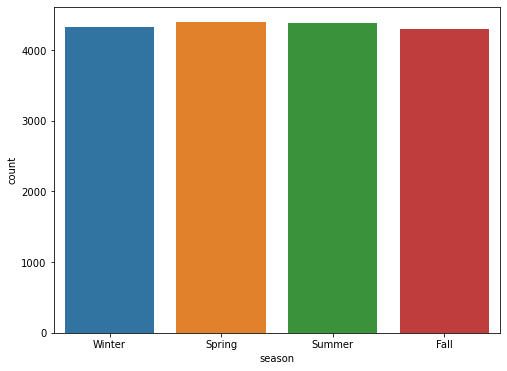

In [34]:
plt.figure(figsize=(8,6))
print(dataset["season"].value_counts())
sns.countplot(dataset["season"])

In [35]:
cat.append("season")

Text(0.5, 1.0, 'Mean cnt of seasons')

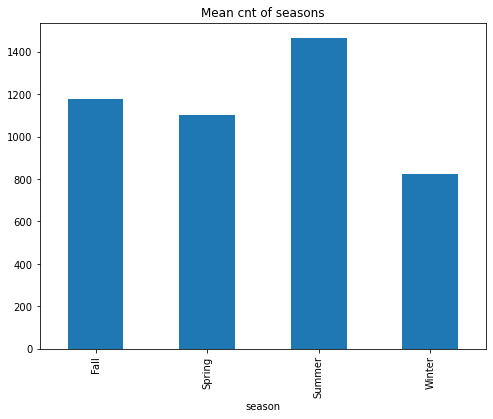

In [36]:
plt.figure(figsize=(8,6))
dataset.groupby("season").mean()["cnt"].plot.bar()
plt.title("Mean cnt of seasons")

In [37]:
print(f"Continuous features are: {con}")
print(f"Continuous features are: {cat}")

Continuous features are: ['t1', 't2', 'hum', 'wind_spped']
Continuous features are: ['weather_code', 'is_holiday', 'is_weekend', 'season']


In [38]:
dataset = pd.get_dummies(dataset, columns=cat, drop_first=True)

# 4. Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
predictors = dataset.drop("cnt", axis=1).values
target = dataset["cnt"].values

X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

In [40]:
X_train.shape

(13931, 15)

In [41]:
X_test.shape

(3483, 15)

In [42]:
Y_train.shape

(13931,)

In [43]:
Y_test.shape

(3483,)

# 5. Model Fitting

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr_tr_preds = lr.predict(X_train)
lr_ts_preds = lr.predict(X_test)
lr_tr_score = np.sqrt(mean_squared_error(Y_train, lr_tr_preds))
lr_ts_score = np.sqrt(mean_squared_error(Y_test, lr_ts_preds))
print(f"RMSE of Linear Regression train set: {np.sqrt(mean_squared_error(Y_train, lr_tr_preds))}")
print(f"RMSE of Linear Regression test set: {np.sqrt(mean_squared_error(Y_test, lr_ts_preds))}")

RMSE of Linear Regression train set: 911.753716605046
RMSE of Linear Regression test set: 923.1411066964579


## Decision Tree 

In [46]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
dtr_tr_preds = dtr.predict(X_train)
dtr_ts_preds = dtr.predict(X_test)
dtr_tr_score = np.sqrt(mean_squared_error(Y_train, dtr_tr_preds))
dtr_ts_score = np.sqrt(mean_squared_error(Y_test, dtr_ts_preds))
print(f"RMSE of Decision Tree Regression train set: {np.sqrt(mean_squared_error(Y_train, dtr_tr_preds))}")
print(f"RMSE of Decision Tree Regression test set: {np.sqrt(mean_squared_error(Y_test, dtr_ts_preds))}")

RMSE of Decision Tree Regression train set: 207.5449741722641
RMSE of Decision Tree Regression test set: 1221.5830048128626


## K Nearest Neighbors 

In [47]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)
knn_tr_preds = knn.predict(X_train)
knn_ts_preds = knn.predict(X_test)
knn_tr_score = np.sqrt(mean_squared_error(Y_train, knn_tr_preds))
knn_ts_score = np.sqrt(mean_squared_error(Y_test, knn_ts_preds))
print(f"RMSE of Decision Tree Regression train set: {np.sqrt(mean_squared_error(Y_train, knn_tr_preds))}")
print(f"RMSE of Decision Tree Regression test set: {np.sqrt(mean_squared_error(Y_test, knn_ts_preds))}")

RMSE of Decision Tree Regression train set: 804.0848169416712
RMSE of Decision Tree Regression test set: 968.8799462759678


# 6. Final Output Score

In [48]:
tr_score = [lr_tr_score, dtr_tr_score, knn_tr_score]

algorithms = ["Linear Regression", "Decision Tree", "K Nearest Neighbors"]

for i in range(len(algorithms)):
    print("The RMSE of train set " + algorithms[i] + "is: " + str(tr_score[i]))

The RMSE of train set Linear Regressionis: 911.753716605046
The RMSE of train set Decision Treeis: 207.5449741722641
The RMSE of train set K Nearest Neighborsis: 804.0848169416712


In [49]:
ts_score = [lr_ts_score, dtr_ts_score, knn_ts_score]

algorithms = ["Linear Regression", "Decision Tree", "K Nearest Neighbors"]

for i in range(len(algorithms)):
    print("The RMSE of test set " + algorithms[i] + "is: " + str(ts_score[i]))

The RMSE of test set Linear Regressionis: 923.1411066964579
The RMSE of test set Decision Treeis: 1221.5830048128626
The RMSE of test set K Nearest Neighborsis: 968.8799462759678


<AxesSubplot:xlabel='Algorithms', ylabel='RMSE'>

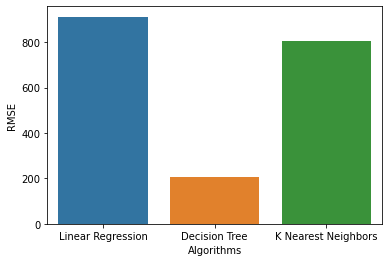

In [50]:
plt.xlabel("Algorithms")
plt.ylabel("RMSE")

sns.barplot(algorithms, tr_score)

<AxesSubplot:xlabel='Algorithms', ylabel='RMSE'>

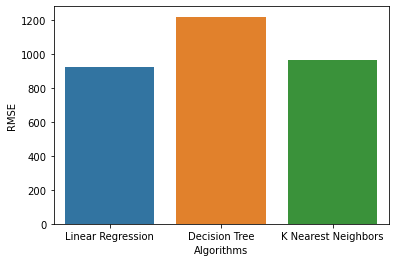

In [51]:
plt.xlabel("Algorithms")
plt.ylabel("RMSE")

sns.barplot(algorithms, ts_score)